# Problem Statement

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.
The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
    Location,
    Tweet At,
    Original Tweet,
    Label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
df=pd.read_csv(r'D:\jupyter\sentiment_analysis_classification\Coronavirus Tweets.csv',encoding = "ISO-8859-1", engine='python')

In [4]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [5]:
df.shape

(41157, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [8]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
#8950 null values are there which is around 20%.Large amount of data is missing so we decided to drop those rows where location
# is null.
df = df.drop(df[df.Location.isnull()].index)

In [10]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [11]:
df.shape

(32567, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32567 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       32567 non-null  int64 
 1   ScreenName     32567 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        32567 non-null  object
 4   OriginalTweet  32567 non-null  object
 5   Sentiment      32567 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.7+ MB


In [13]:
#There are 5 category in sentiments
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [14]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Neutral'),
  Text(1, 0, 'Positive'),
  Text(2, 0, 'Negative'),
  Text(3, 0, 'Extremely Positive'),
  Text(4, 0, 'Extremely Negative')])

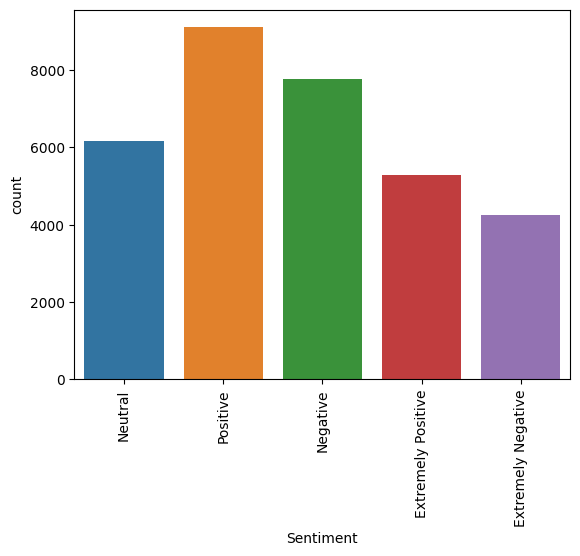

In [15]:
#maximum percentage of tweets is positive tweets with 27.97% whereas lowest is extremely negative tweets 13.05%.
sns.countplot(x=df['Sentiment'])
plt.xticks(rotation=90)

In [16]:
type=df['Sentiment'].value_counts()
type

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [17]:
label=type.index
label

Index(['Positive', 'Negative', 'Neutral', 'Extremely Positive',
       'Extremely Negative'],
      dtype='object')

In [18]:
y=type.values
y

array([9110, 7763, 6172, 5273, 4249], dtype=int64)

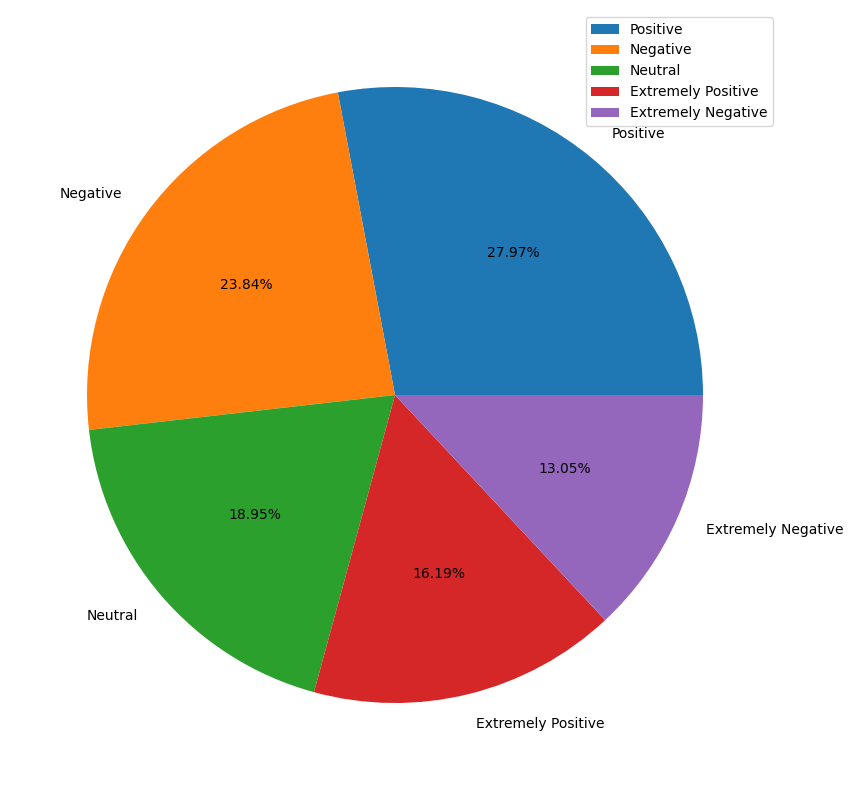

In [19]:
plt.figure(figsize=(10,10))
plt.pie(y,labels=label,autopct="%1.2f%%")
plt.legend()
plt.show()

In [20]:
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [21]:
df['TweetAt'].value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '16-03-2020'),
  Text(1, 0, '17-03-2020'),
  Text(2, 0, '18-03-2020'),
  Text(3, 0, '19-03-2020'),
  Text(4, 0, '20-03-2020'),
  Text(5, 0, '21-03-2020'),
  Text(6, 0, '22-03-2020'),
  Text(7, 0, '23-03-2020'),
  Text(8, 0, '24-03-2020'),
  Text(9, 0, '25-03-2020'),
  Text(10, 0, '26-03-2020'),
  Text(11, 0, '27-03-2020'),
  Text(12, 0, '28-03-2020'),
  Text(13, 0, '29-03-2020'),
  Text(14, 0, '30-03-2020'),
  Text(15, 0, '31-03-2020'),
  Text(16, 0, '01-04-2020'),
  Text(17, 0, '02-04-2020'),
  Text(18, 0, '03-04-2020'),
  Text(19, 0, '04-04-2020'),
  Text(20, 0, '05-04-2020'),
  Text(21, 0, '06-04-2020'),
  Text(22, 0, '07-04-2020'),
  Text(23, 0, '08-04-2020'),
  Text(24, 0, '09-04-2020'),
  Text(25, 0, '10-04-2020'),
  Text(26, 0, '11-04-2020'),
  Text(27, 0, '12-04-2020'),
  Text(28, 0, '13-04-2020'),
  Text(29, 0, '14-04-2020')])

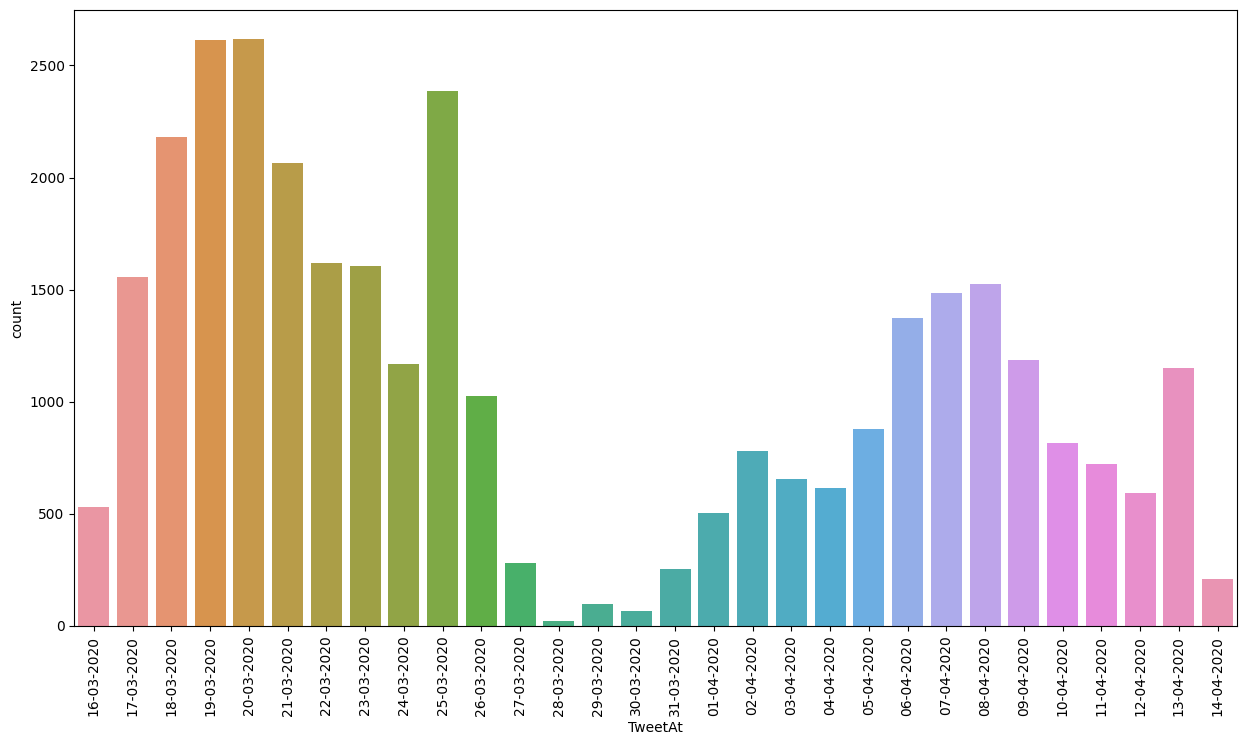

In [22]:
#maximum number of tweets happened on 19th and 20th march.This may be because on 19th march lockdown was announced worldwide.
plt.figure(figsize=(15,8))
sns.countplot(x=df['TweetAt'])
plt.xticks(rotation=90)

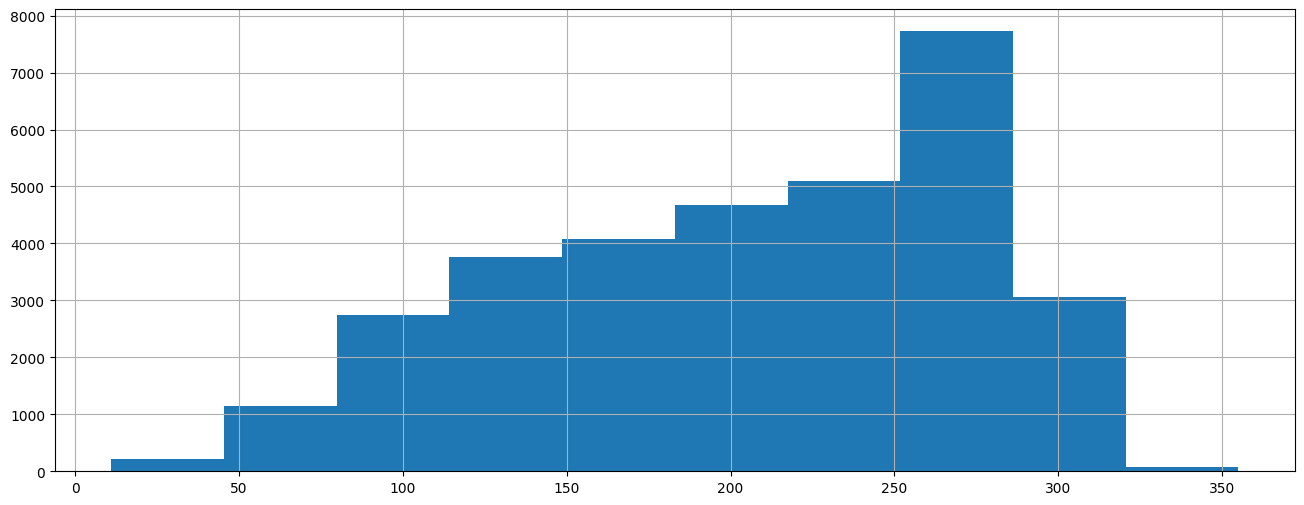

In [23]:
#length of the tweet vs no of people.Around 8000 people have tweeted of length more than 250 words.
plt.figure(figsize=(16,6))
plt.grid()
plt.hist(df['OriginalTweet'].str.len())
plt.show()

In [24]:
location_top10=df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'London'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'London, England'),
  Text(3, 0, 'New York, NY'),
  Text(4, 0, 'Washington, DC'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Los Angeles, CA'),
  Text(7, 0, 'India'),
  Text(8, 0, 'UK'),
  Text(9, 0, 'Australia')])

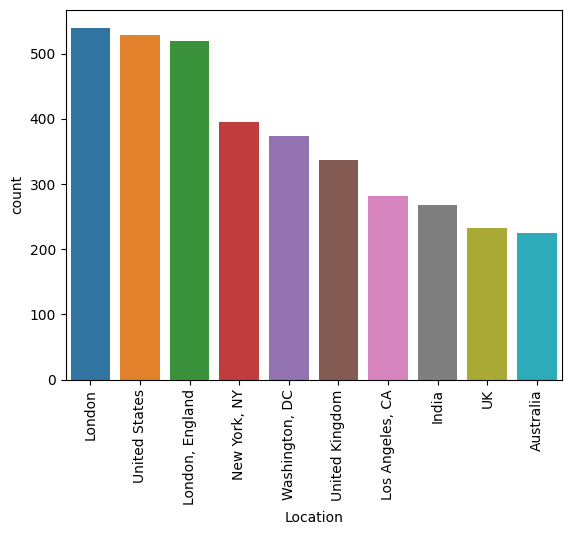

In [25]:
#most number of tweets has been done from london followed by newyork
sns.countplot(data=df[df['Location'].isin(location_top10.index)],x='Location',order=location_top10.index)
plt.xticks(rotation=90)

In [26]:
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
df = df.replace(replace_values)

In [27]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [28]:
df['Sentiment'].value_counts()

Positive    14383
Negative    12012
Neutral      6172
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

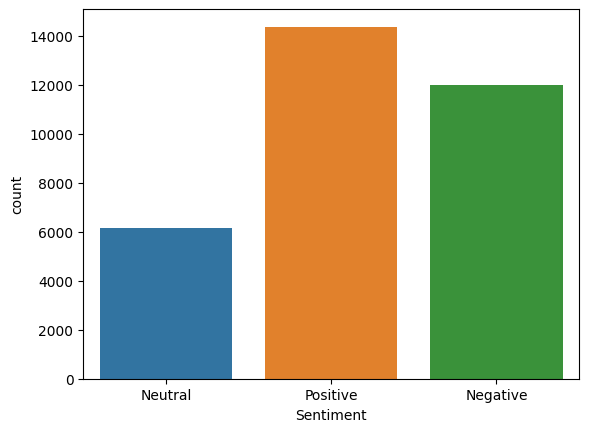

In [29]:
sns.countplot(x=df['Sentiment'])

TEXT PREPROCESSING

Removing link/URL

In [30]:
import re

In [31]:
df1=df.copy()

In [32]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [33]:
#by this line URL present in original tweet column will get removed and replaced by space.
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [34]:
#original tweet
df['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [35]:
#copied tweet
df1['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports  '

Removing Usernames/@USER

In [36]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('@[\w]*',' ', str(x)))

In [37]:
df1['OriginalTweet'][5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,   reports  '

Removing Punctuations/numbers/Special character

In [38]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [39]:
df1['OriginalTweet'][5]

'As news of the region  s first confirmed COVID    case came out of Sullivan County last week  people flocked to area stores to purchase cleaning supplies  hand sanitizer  food  toilet paper and other goods    reports  '

Removing Stopwords and Tokenizing

In [40]:
#importing stopwords
import nltk
from nltk.corpus import stopwords

In [41]:
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhishek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [43]:
df1['OriginalTweet']= df1['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [44]:
df1.OriginalTweet[5]

['news',
 'region',
 'first',
 'confirmed',
 'covid',
 'case',
 'came',
 'sullivan',
 'county',
 'last',
 'week',
 'people',
 'flocked',
 'area',
 'stores',
 'purchase',
 'cleaning',
 'supplies',
 'hand',
 'sanitizer',
 'food',
 'toilet',
 'paper',
 'goods',
 'reports']

In [45]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,[],Neutral
1,3800,48752,UK,16-03-2020,"[advice, talk, neighbours, family, exchange, p...",Positive
2,3801,48753,Vagabonds,16-03-2020,"[coronavirus, australia, woolworths, give, eld...",Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,"[news, region, first, confirmed, covid, case, ...",Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,"[cashier, grocery, store, sharing, insights, c...",Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,"[really, shitting, much, home, covid, coronavi...",Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,"[still, shocked, number, toronto, supermarket,...",Negative
41150,44949,89901,OHIO,14-04-2020,"[never, situation, amp, world, going, supermar...",Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,"[airline, pilots, offering, stock, supermarket...",Neutral


Stemming

In [46]:
from nltk.stem.snowball import SnowballStemmer
#Function of stemming

#create an object for stemming function
stemmer=SnowballStemmer("english")

#function which stems each word in given text
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [47]:
df1['OriginalTweet']= df1['OriginalTweet'].apply(lambda x:stemming(x))

In [48]:
df1.OriginalTweet[5]

'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report'

In [49]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news region first confirm covid case came sull...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier groceri store share insight covid prov...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,realli shit much home covid coronavirus toiletpap,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,still shock number toronto supermarket employe...,Negative
41150,44949,89901,OHIO,14-04-2020,never situat amp world go supermarket pick pac...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airlin pilot offer stock supermarket shelv nz ...,Neutral


WORDCLOUDS

In [50]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

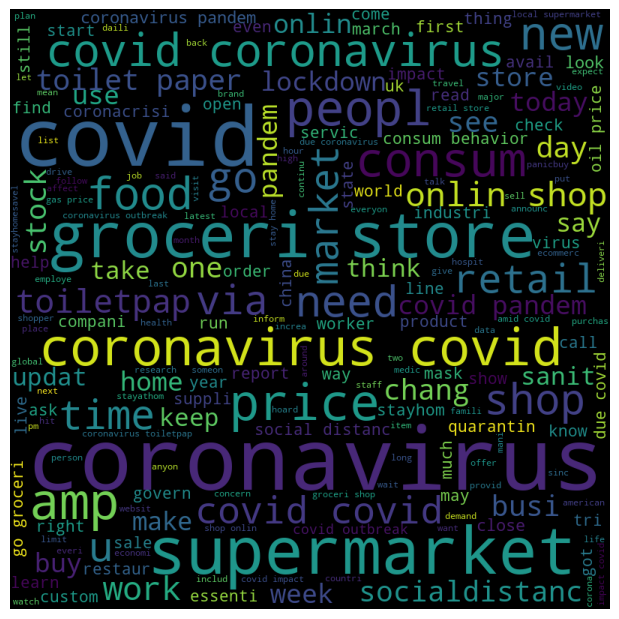

In [51]:
#coronavirus,covid,grocery store,supermarket,retail are the main words which is used more frequently in tweets whose sentiment
#is neutral


#word cloud for neutral sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == 'Neutral'])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

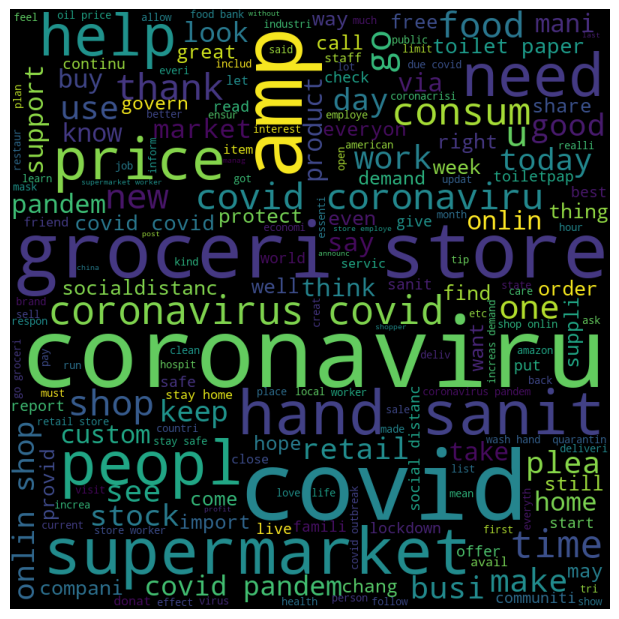

In [52]:
#coronavirus,price,help,thank,covid,supermarket, grocery store,people,need, hand sanit,ggod food are the words which is used
#most no of times in tweets whose sentiments are positive.

#word cloud for positive sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == 'Positive'])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

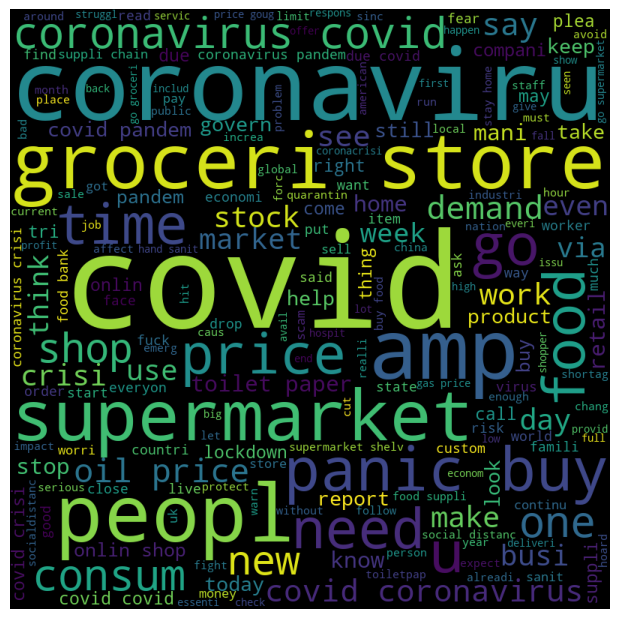

In [53]:
#covid,coronavirus,supermarket,toilet paper,panic,need,stock,crisis,food,buy are the words which is most used in the tweets
#whose sentiments are negative

#word cloud for negative sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == 'Negative'])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Machine Learning models

In [54]:
#Independent variables
X=df1.OriginalTweet

#Dependent Variable
y=df1.Sentiment

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26053,)
(6514,)
(26053,)
(6514,)


LOGISTIC REGRESSION

In [57]:
#TfidfVectorizer: This is a preprocessing step that converts text data into numerical feature vectors using the TF-IDF (term frequency-inverse document frequency) weighting scheme. This step is commonly used in text classification tasks.
#solver=lbfgs is a parameter of the LogisticRegression algorithm in scikit-learn, which specifies the solver or optimization algorithm to use to minimize the logistic regression objective function
tvec=TfidfVectorizer()
LR=LogisticRegression(solver='lbfgs',max_iter=10000)

In [58]:
from sklearn.pipeline import Pipeline

model=Pipeline([('vectorizer',tvec),('classifer',LR)])
model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifer', LogisticRegression(max_iter=10000))])

In [59]:
y_pred=model.predict(X_test)

In [60]:
#F1 score in logistic regression is 79.35%
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred,y_test,average='weighted'))

Accuracy : 0.7907583665950261
Precision : 0.7994236946534782
Recall : 0.7907583665950261
F1_Score : 0.7935510185489791


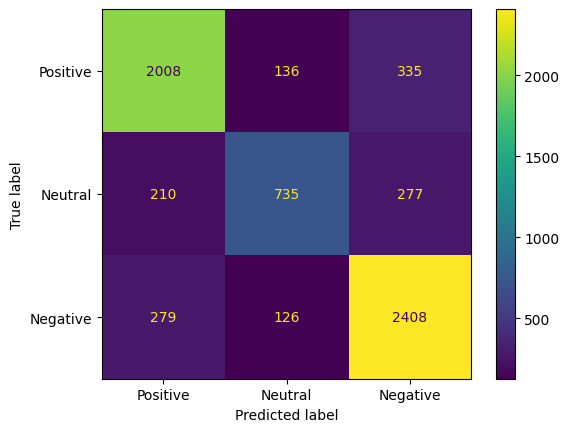

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

PASSIVE ACTIVE CLASSIFIER

In [62]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',pac)])
model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', PassiveAggressiveClassifier())])

In [63]:
y_pred_pac=model2.predict(X_test)

In [64]:
#F1 score in passive aggresive classifier is 74.18%
print('Accuracy :' ,accuracy_score(y_pred_pac,y_test))
print('Precision :', precision_score(y_pred_pac,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_pac,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_pac,y_test,average='weighted'))

Accuracy : 0.7471599631562788
Precision : 0.7487301827130419
Recall : 0.7471599631562788
F1_Score : 0.7477535366037713


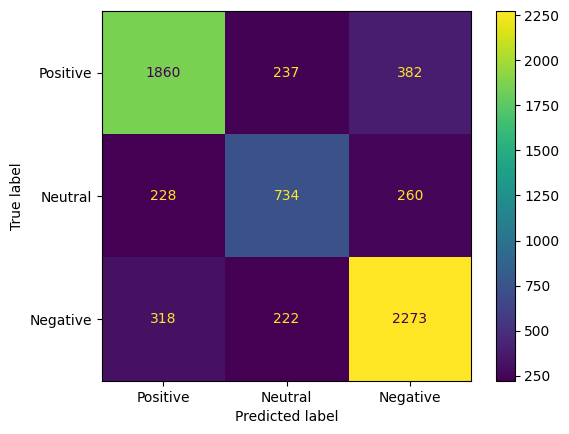

In [65]:
cm1 = confusion_matrix(y_test, y_pred_pac)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm1, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [66]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss='hinge',penalty='l2',random_state=0)
model3=Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd=model3.predict(X_test)

In [67]:
#f1 score stochastic gradient descent is 79.13%
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_sgd,y_test,average='weighted'))

Accuracy : 0.7853853239177156
Precision : 0.8065817126590645
Recall : 0.7853853239177156
F1_Score : 0.7913622341792244


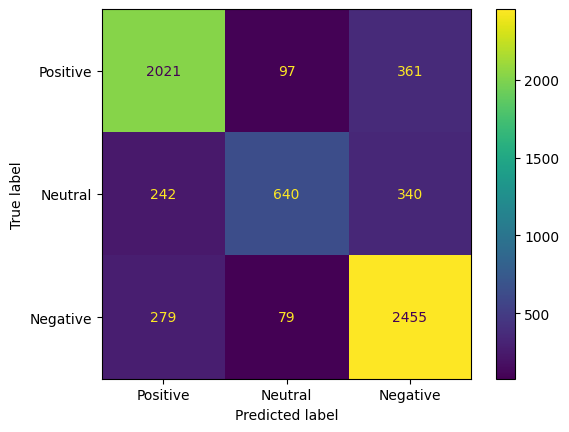

In [68]:
cm2 = confusion_matrix(y_test, y_pred_sgd)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm2, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

SUPPORT VECTOR CLASSIFICATION

In [69]:
from sklearn.svm import SVC

svc=SVC()
model4=Pipeline([('vectorizer',tvec),('classifier',svc)])
model4.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [70]:
y_pred_svc=model4.predict(X_test)

In [71]:
y_pred_svc

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

In [72]:
#f1 score in support vector machine is 78.96%
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_svc,y_test,average='weighted'))

Accuracy : 0.7859993859379797
Precision : 0.7980301994333108
Recall : 0.7859993859379797
F1_Score : 0.7896660176532125


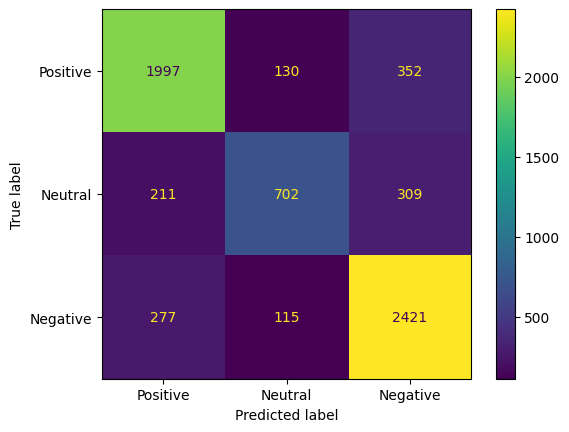

In [73]:
cm3= confusion_matrix(y_test, y_pred_svc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm3, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

In [75]:
model5=Pipeline([('vectorizer',tvec),('classifier',rf)])
model5.fit(X_train,y_train)
y_pred_rf=model5.predict(X_test)

In [76]:
y_pred_rf

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

In [77]:
#f1score in random forest classifier is 74.89%
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_rf,y_test,average='weighted'))

Accuracy : 0.7486951182069389
Precision : 0.7550358091870668
Recall : 0.7486951182069389
F1_Score : 0.7501914305575232


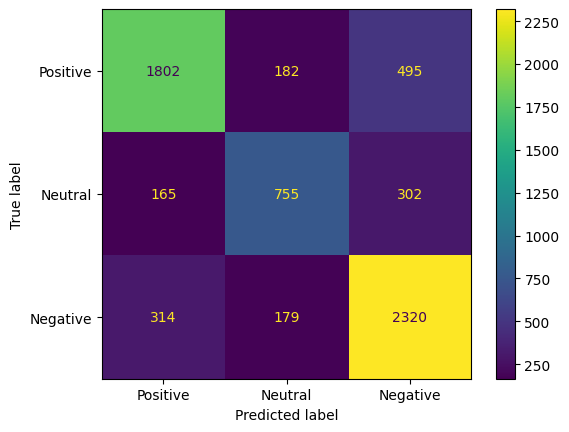

In [78]:
cm4= confusion_matrix(y_test, y_pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm4, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

reg=KNeighborsClassifier()

In [93]:
model6=Pipeline([('vectorizer',tvec),('classifier',reg)])
model6.fit(X_train,y_train)
y_pred_reg=model6.predict(X_test)

In [94]:
y_pred_reg

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Negative',
       'Neutral'], dtype=object)

In [95]:
#f1 score in knn is 31.34%
print('Accuracy :' ,accuracy_score(y_pred_reg,y_test))
print('Precision :', precision_score(y_pred_reg,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_reg,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_reg,y_test,average='weighted'))

Accuracy : 0.2144611605772183
Precision : 0.9588256440735748
Recall : 0.2144611605772183
F1_Score : 0.31341019505876827


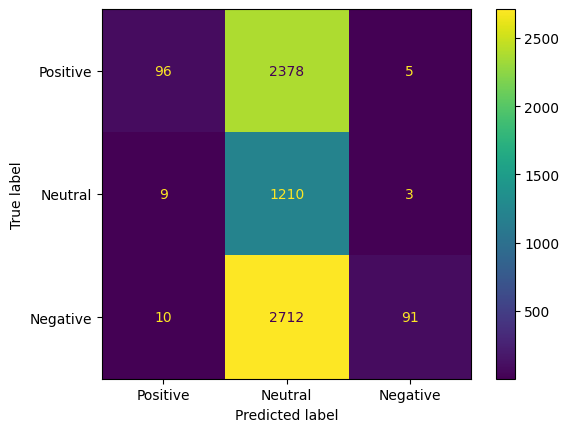

In [96]:
cm5= confusion_matrix(y_test, y_pred_reg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm5, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

DECISION TREE CLASSIFIER

In [102]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

In [103]:
model7=Pipeline([('vectorizer',tvec),('classifier',dt)])
model7.fit(X_train,y_train)
y_pred_dt=model7.predict(X_test)

In [104]:
y_pred_dt

array(['Neutral', 'Neutral', 'Positive', ..., 'Positive', 'Negative',
       'Negative'], dtype=object)

In [105]:
#f1 score in decision tree classifier is 64.16%
print('Accuracy :' ,accuracy_score(y_pred_dt,y_test))
print('Precision :', precision_score(y_pred_dt,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_dt,y_test, average='weighted'))
print('F1_Score :',f1_score(y_pred_dt,y_test,average='weighted'))

Accuracy : 0.6429229352164568
Precision : 0.6419203651310204
Recall : 0.6429229352164568
F1_Score : 0.6416722357632763


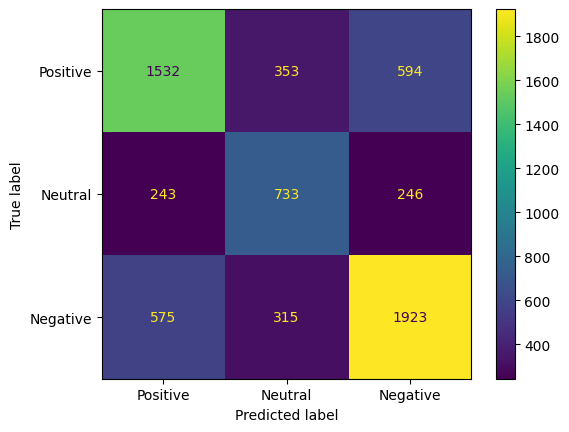

In [106]:
cm6= confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =cm6, display_labels = ['Positive','Neutral','Negative'])
cm_display.plot()
plt.show()

COMPARISON BETWEEN MODELS

In [ ]:
models=pd.DataFrame({'Model':['Logistic Regression','Passive Aggressive Classifier','Stochastic Gradient Descent Classifier',
                             'Random Forest','Support Vector Machine','KNN','Decision Tree Classifier'],
                    'Accuracy':[f1_score(y_pred,y_test),]})

In [109]:
#creating dataframe to compare models
i=0
comparison=pd.DataFrame()

In [114]:
#inserting values of logistic regression in dataframe
comparison.loc[i,"Model_Name"]='LOGISTIC REGRESSION'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred,y_test,average='weighted'),4)
i+=1

In [115]:
#inserting values of passive aggresive classifier in dataframe
comparison.loc[i,"Model_Name"]='PASSIVE AGGRESIVE CLASSIFIER'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_pac,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_pac,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_pac,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_pac,y_test,average='weighted'),4)
i+=1

In [116]:
#inserting values of stochastic gradient descent classifier in dataframe
comparison.loc[i,"Model_Name"]='STOCHASTIC GRADIENT DESCENT CLASSIFIER'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_sgd,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_sgd,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_sgd,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_sgd,y_test,average='weighted'),4)
i+=1

In [117]:
#inserting values of random forest classifier in dataframe
comparison.loc[i,"Model_Name"]='RANDOM FOREST'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_rf,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_rf,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_rf,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_rf,y_test,average='weighted'),4)
i+=1

In [119]:
#inserting values of support vector classifier in dataframe
comparison.loc[i,"Model_Name"]='SUPPORT VECTOR CLASSIFIER'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_svc,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_svc,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_svc,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_svc,y_test,average='weighted'),4)
i+=1

In [120]:
#inserting values of knn classifier in dataframe
comparison.loc[i,"Model_Name"]='KNN CLASSIFIER'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_reg,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_reg,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_reg,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_reg,y_test,average='weighted'),4)
i+=1

In [121]:
#inserting values of decision tree classifier in dataframe
comparison.loc[i,"Model_Name"]='DECISION TREE CLASSIFIER'
comparison.loc[i,"Accuracy"]=round(accuracy_score(y_pred_dt,y_test),4)
comparison.loc[i,"Precision"]=round(precision_score(y_pred_dt,y_test, average='weighted'),4)
comparison.loc[i,"Recall"]=round(recall_score(y_pred_dt,y_test, average='weighted'),4)
comparison.loc[i,"F1 score"]=round(f1_score(y_pred_dt,y_test,average='weighted'),4)
i+=1

In [142]:
#sorting by F1 score
comparison.sort_values(by=['F1 score'],ascending=False,inplace=True)

In [143]:
comparison

,level_0,index,Model_Name,Accuracy,Precision,Recall,F1 score
0,0,0,LOGISTIC REGRESSION,0.7908,0.7994,0.7908,0.7936
1,1,2,STOCHASTIC GRADIENT DESCENT CLASSIFIER,0.7854,0.8066,0.7854,0.7914
2,2,4,SUPPORT VECTOR CLASSIFIER,0.7860,0.7980,0.7860,0.7897
3,3,3,RANDOM FOREST,0.7487,0.7550,0.7487,0.7502
4,4,1,PASSIVE AGGRESIVE CLASSIFIER,0.7472,0.7487,0.7472,0.7478
5,5,6,DECISION TREE CLASSIFIER,0.6429,0.6419,0.6429,0.6417
6,6,5,KNN CLASSIFIER,0.2145,0.9588,0.2145,0.3134


We can conclude that logistic regression is the best model for our dataset.